In [28]:
%matplotlib inline

import numpy as np
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [18]:
dataframe = pandas.read_csv('international-airline-passengers.csv',
                          usecols=[1], engine='python')
type(dataframe)

pandas.core.frame.DataFrame

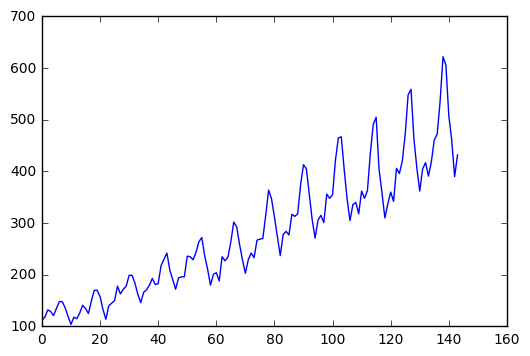

In [3]:
plt.plot(dataset)
plt.show()

In [19]:
np.random.seed(7)
dataset = dataframe.values.astype(np.float32)
type(dataset)

numpy.ndarray

In [77]:
def generate_data(dataset, look_back=1, test_split=0.25):
    x = []
    y = []
    for i in range(look_back, len(dataset) - 1):
        x.append(dataset[i - look_back:i, 0])
        y.append(dataset[i, 0])
    split_index = int(len(x) * (1. - test_split))
    return (np.array(x[:split_index]), np.array(y[:split_index])), (np.array(x[split_index:]), np.array(y[split_index:]))

In [174]:
look_back = 4
(X_train, Y_train), (X_test, Y_test) = generate_data(dataset, look_back)
for i in range(0, 5):
    print("%s -> %d" % (X_train[i], Y_train[i]))

print("Train shape: %s -> %s" % (X_train.shape, Y_train.shape))
print("Test shape: %s -> %s" % (X_test.shape, Y_test.shape))

[ 112.  118.  132.  129.] -> 121
[ 118.  132.  129.  121.] -> 135
[ 132.  129.  121.  135.] -> 148
[ 129.  121.  135.  148.] -> 148
[ 121.  135.  148.  148.] -> 136
Train shape: (104, 4) -> (104,)
Test shape: (35, 4) -> (35,)


In [175]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', accuracy=['metrics'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_38 (Dense)                 (None, 8)             40          dense_input_15[0][0]             
____________________________________________________________________________________________________
dense_39 (Dense)                 (None, 1)             9           dense_38[0][0]                   
Total params: 49
Trainable params: 49
Non-trainable params: 0
____________________________________________________________________________________________________
None


In [176]:
model.fit(X_train, Y_train, nb_epoch=200, batch_size=2, verbose=1)

Epoch 1/200
104/104 [==============================] - 0s - loss: 46799.8025      
Epoch 2/200
104/104

In [172]:
score = model.evaluate(X_test, Y_test)
print("Score: %1.4f" % score)

32/36 [=========================>....] - ETA: 0sScore: 2517.1370


The output is pretty close to the input.

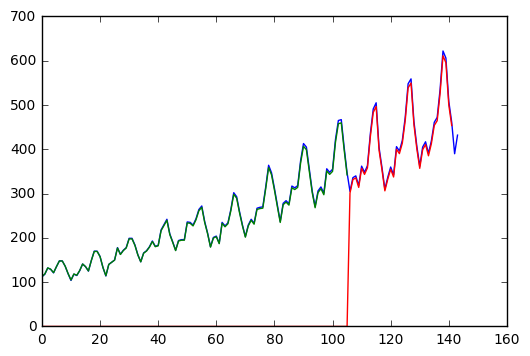

In [173]:
trainedPrediction = model.predict(X_train)
testedPrediction = model.predict(X_test)
plt.plot(dataset)
plt.plot(trainedPrediction)
plt.plot(np.concatenate((np.zeros_like(X_train), testedPrediction)))
plt.show()